In [1]:
# Car Model Prediction

In [44]:
from src.models import SVM, Classifier
from src.train import train, validate
from src.utils import show_images, load_test_images, load_train_images
from src.reader import ImageFolderWithPaths, TrainSet, TestSet

import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'\n{device} will be used as device')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

cuda:0 will be used as device


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

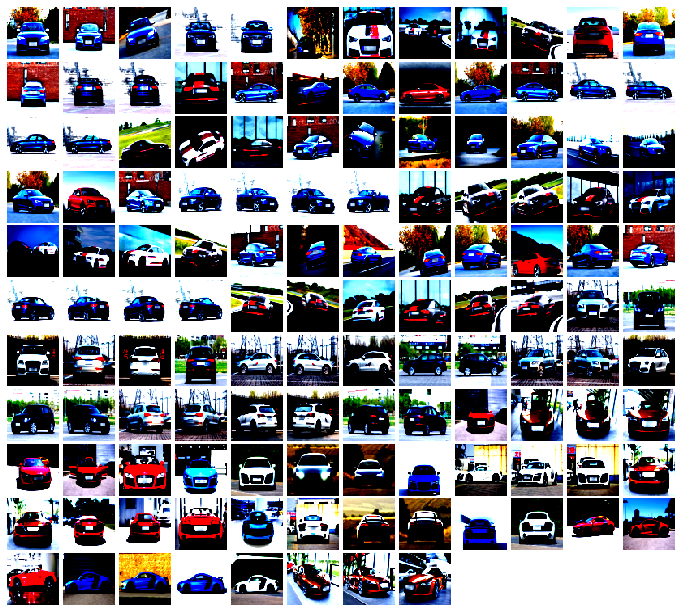

In [38]:
# Load data and display

root = 'data/data'
scale_size = 64

train_data_list = load_train_images(root + '/train_test_split/verification/verification_train.txt')
test_data_list = load_test_images(root + '/train_test_split/verification/verification_pairs_easy.txt')

transform = transforms.Compose([
   transforms.Resize((scale_size, scale_size)),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])

train_data = TrainSet(root + '/image', train_data_list, transform)
test_data = TestSet(root + '/image', test_data_list, transform)

batch_size = 128

train_loader = DataLoader(train_data, batch_size=batch_size, drop_last=True)
val_loader = None
test_loader = DataLoader(test_data, batch_size=batch_size, drop_last=True)


imgs = train_loader.__iter__().next()[0].numpy().squeeze()
show_images(imgs, color=True)

In [ ]:
#SVM

In [47]:
learning_rate = 0.001
epochs = 1

model = SVM().to(device)
optim = torch.optim.Adam(model.parameters(), lr=learning_rate, betas = (0.5, 0.999))

# train
svm_losses = train(model, optim, batch_size, num_epochs=epochs, device=device, train_loader=test_loader, val_loader=val_loader)

EPOCH:  1


RuntimeError: output with shape [512] doesn't match the broadcast shape [1, 512, 1, 512]

In [ ]:
# plot error

plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(svm_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
loss, acc = validate(test_loader)
print(f'SVM test accuracy is: {acc}')

In [ ]:
# Classifier

In [ ]:
learning_rate = 0.001
epochs = 50

model = Classifier().to(device)
optim = torch.optim.Adam(model.parameters(), lr=learning_rate, betas = (0.5, 0.999))

# train
classifier_losses = train(model, optim, batch_size, num_epochs=epochs, device=device, train_loader=train_loader, val_loader=val_loader)

In [ ]:
# plot error

plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(classifier_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
loss, acc = validate(test_loader)
print(f'Classifier test accuracy is: {acc}')